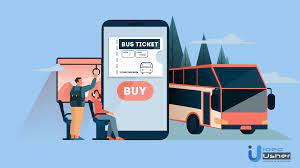

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/kaggle/input/booking-traveling/bookings_data.xlsx')
df.head()

,booking_id,booked_from,date_booking,number_passengers,booking_status,date_cancellation,user_id,date_joined,address_origin,address_destination,...,date_ride,busline_name,driver_name,rating_driver,rating_service,initial_price,payment_mode,discount_code,address_pickup,address_dropoff
0,19294,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaT,1076,2023-03-31,Bernoussi,Bouskoura 27182,...,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,NaN,NaN,30,ZERO,SEW1023,Amlak Bernoussi - Ecole primaire Al Marwa,Bouskoura - Parc Industriel CFCIM
1,19468,APP,2023-10-15,1,Ride Confirmed,NaT,2289,2023-09-03,"7 Rue du Rif، Mohammédia, Maroc",CSN,...,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,NaN,NaN,30,CREDIT,NaN,Mohammedia - Place de la Gare ONCF,Casa Nearshore - Ibis
2,19264,CALL_CENTER,2023-10-13,1,Ride Confirmed,NaT,1070,2023-03-31,H.Assalam#2,Bouskoura 27182,...,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,NaN,NaN,30,ZERO,SEW1023,Anassi - Commune Ahl Loghlam,Bouskoura - Parc Industriel CFCIM
3,19527,APP,2023-10-15,1,Ride Confirmed,NaT,3237,2023-10-11,"MJWM+M84, Mohammédia, Maroc",CSN,...,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,NaN,NaN,30,CB,NaN,Mohammedia - Café Nevsky,Casa Nearshore - Ibis
4,19240,CALL_CENTER,2023-10-13,1,Cancelled by driver,2023-10-16,2283,2023-09-01,"334 Bd Ibn Tachfine, Casablanca 20560, Morocco",Bouskoura,...,2023-10-16,LV BERN> BSK (via CN-BOURNAZIL-H.MO-A.SEB) 07-23,RACHID NAHHAL,NaN,NaN,25,ZERO,LACASEM1023,H.mohammadi - Bd ibn tachfine ste générale oqba,Bouskoura - Parc Industriel Oulad Salah CFCIM


## Understanding Dataset

1. **booking_id:** An identifier for each booking, stored as integers. Each booking has a unique booking_id.

2. **booked_from:** The source or platform from which the booking was made. It is stored as an object (likely a string).

3. **date_booking:** The date and time when the booking was made, stored as a datetime object.

4. **number_passengers:** The count of passengers associated with the booking, stored as integers.

5. **booking_status:** The status of the booking (e.g., confirmed, canceled), stored as an object (likely a string).

6. **date_cancellation:** The date and time when the booking was canceled, stored as a datetime object. It has non-null values only for canceled bookings.

7. **user_id:** An identifier for the user associated with the booking, stored as integers. Each user has a unique user_id.

8. **date_joined:** The date and time when the user joined the platform, stored as a datetime object.

9. **address_origin:** The starting point or origin address for the booking, stored as an object (likely a string).

10. **address_destination:** The destination address for the booking, stored as an object (likely a string).

11. **is_user_anonymized:** A boolean indicating whether the user's information is anonymized.

12. **date_ride:** The date and time of the ride associated with the booking, stored as a datetime object.

13. **busline_name:** The name of the bus line, stored as an object (likely a string).

14. **driver_name:** The name of the driver assigned to the ride, stored as an object (likely a string).

15. **rating_driver:** The rating given by the user to the driver, stored as floats.

16. **rating_service:** The rating given by the user to the overall service, stored as floats.

17. **initial_price:** The initial price associated with the booking, stored as integers.

18. **payment_mode:** The mode of payment used for the booking, stored as an object (likely a string).

19. **discount_code:** The discount code applied to the booking, stored as an object (likely a string).

20. **address_pickup:** The pickup address for the ride, stored as an object (likely a string).

21. **address_dropoff:** The drop-off address for the ride, stored as an object (likely a string).


In [3]:
df.columns

Index(['booking_id', 'booked_from', 'date_booking', 'number_passengers',
       'booking_status', 'date_cancellation', 'user_id', 'date_joined',
       'address_origin', 'address_destination', 'is_user_anonymized',
       'date_ride', 'busline_name', 'driver_name', 'rating_driver',
       'rating_service', 'initial_price', 'payment_mode', 'discount_code',
       'address_pickup', 'address_dropoff'],
      dtype='object')

In [4]:
df.shape

(17722, 21)

In [5]:
df.describe()

,booking_id,date_booking,number_passengers,date_cancellation,user_id,date_joined,date_ride,rating_driver,rating_service,initial_price
count,17722.000000,17722,17722.000000,1986,17722.000000,17413,17722,3899.000000,3911.000000,17722.000000
mean,16632.025561,2023-09-07 19:07:04.557047808,1.003724,2023-09-02 15:05:37.160120832,1818.313791,2023-06-16 12:01:11.946246912,2023-09-09 19:06:35.305270528,4.865350,4.754538,22.222040
min,5176.000000,2023-04-29 00:00:00,1.000000,2023-04-29 00:00:00,116.000000,2023-01-17 00:00:00,2023-05-02 00:00:00,1.000000,1.000000,0.000000
25%,10399.250000,2023-07-15 00:00:00,1.000000,2023-07-10 00:00:00,1090.000000,2023-04-02 00:00:00,2023-07-18 00:00:00,5.000000,5.000000,18.000000
50%,16195.500000,2023-09-20 00:00:00,1.000000,2023-09-13 00:00:00,1587.000000,2023-06-12 00:00:00,2023-09-21 00:00:00,5.000000,5.000000,20.000000
75%,22627.750000,2023-11-07 00:00:00,1.000000,2023-11-07 00:00:00,2216.000000,2023-08-22 00:00:00,2023-11-09 00:00:00,5.000000,5.000000,25.000000
max,29473.000000,2023-12-08 00:00:00,2.000000,2023-12-09 00:00:00,5005.000000,2023-12-06 00:00:00,2023-12-09 00:00:00,5.000000,5.000000,60.000000
std,7079.533966,NaN,0.060914,NaN,932.390039,NaN,NaN,0.568163,0.817700,6.292152


In [6]:
num_duplicated_rows = df.duplicated().sum()
print("Count of Duplicated rows is :",num_duplicated_rows)

Count of Duplicated rows is : 0


In [7]:
df.dtypes

booking_id                      int64
booked_from                    object
date_booking           datetime64[ns]
number_passengers               int64
booking_status                 object
date_cancellation      datetime64[ns]
user_id                         int64
date_joined            datetime64[ns]
address_origin                 object
address_destination            object
is_user_anonymized               bool
date_ride              datetime64[ns]
busline_name                   object
driver_name                    object
rating_driver                 float64
rating_service                float64
initial_price                   int64
payment_mode                   object
discount_code                  object
address_pickup                 object
address_dropoff                object
dtype: object

# **Data Cleaning**

In [8]:
df['date_cancellation']=df['date_cancellation'].fillna(value='0') # explan value 0 ticket not canceled

In [9]:
df['discount_code']=df['discount_code'].fillna(value='0')  # value 0 explan this person not use discount code

In [10]:
dj=df['date_joined'].mode()
df['date_joined']=df['date_joined'].fillna(value=dj)  ## value dj not effected in data when we use mode

In [11]:
df['busline_name']=df['busline_name'].fillna(value='none')
df['driver_name']=df['driver_name'].fillna(value='none')

In [12]:
df['date_joined']=df['date_joined'].fillna(method='ffill')

In [13]:
print(f'mean of rating driver',{df['rating_driver'].mean()}),print(f'mean of rating service ',{df['rating_service'].mean()})
df['rating_driver']=df['rating_driver'].fillna(value=df['rating_driver'].mean())
df['rating_service']=df['rating_service'].fillna(value=df['rating_service'].mean())
print(f'mean of rating driver After cleaning ',{df['rating_driver'].mean()}),print(f'mean of rating service After cleaning',{df['rating_service'].mean()})

mean of rating driver {4.865350089766607}
mean of rating service  {4.754538481206852}
mean of rating driver After cleaning  {4.865350089766607}
mean of rating service After cleaning {4.754538481206851}


(None, None)

In [14]:
df.isnull().sum() ## Done✅✅

booking_id             0
booked_from            0
date_booking           0
number_passengers      0
booking_status         0
date_cancellation      0
user_id                0
date_joined            0
address_origin         0
address_destination    0
is_user_anonymized     0
date_ride              0
busline_name           0
driver_name            0
rating_driver          0
rating_service         0
initial_price          0
payment_mode           0
discount_code          0
address_pickup         0
address_dropoff        0
dtype: int64

In [15]:
df['date_cancellation'].value_counts()

date_cancellation
0                      15736
2023-12-05 00:00:00       35
2023-12-04 00:00:00       32
2023-07-18 00:00:00       30
2023-05-22 00:00:00       29
                       ...  
2023-09-03 00:00:00        1
2023-11-06 00:00:00        1
2023-08-27 00:00:00        1
2023-11-11 00:00:00        1
2023-06-09 00:00:00        1
Name: count, Length: 195, dtype: int64

In [16]:
df['busline_name']

0                   LV AZHAR > BSK (via S.MOUMEN-CN) 05-23
1                  LV MOHA > BSK (via Beauséjour-CN) 05-23
2                   LV AZHAR > BSK (via S.MOUMEN-CN) 05-23
3                  LV MOHA > BSK (via Beauséjour-CN) 05-23
4         LV BERN> BSK (via CN-BOURNAZIL-H.MO-A.SEB) 07-23
                               ...                        
17717    LV Z.I Ain sebaa > Salmiya (Via Moulay Rachid ...
17718    LV Z.I Ain sebaa > Salmiya (Via Moulay Rachid ...
17719    LV Z.I Ain sebaa > Derb Ghallef (Via Houbouss ...
17720    LV Z.I Ain sebaa > Derb Ghallef (Via Houbouss ...
17721    LV Z.I Ain sebaa > Salmiya (Via Moulay Rachid ...
Name: busline_name, Length: 17722, dtype: object

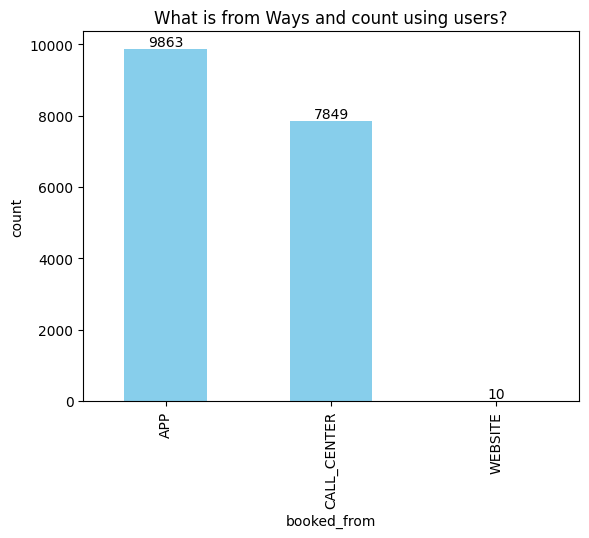

In [17]:
bf = df['booked_from'].value_counts().plot(kind='bar',color='skyblue')
for p in bf.patches:
    bf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What is from Ways and count using users?')
plt.xlabel('booked_from')
plt.ylabel('count')
plt.show()

## What is mostly month booking ticket

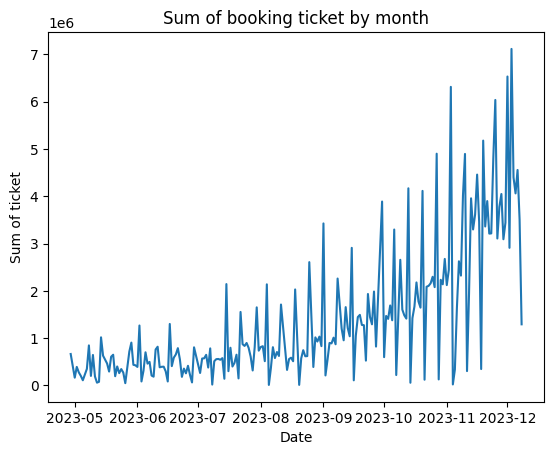

In [18]:
co=df.groupby('date_booking')['booking_id'].sum().reset_index()
sns.lineplot(x=co['date_booking'],y=co['booking_id'])
plt.title('Sum of booking ticket by month')
plt.xlabel('Date')
plt.ylabel('Sum of ticket')
plt.show()

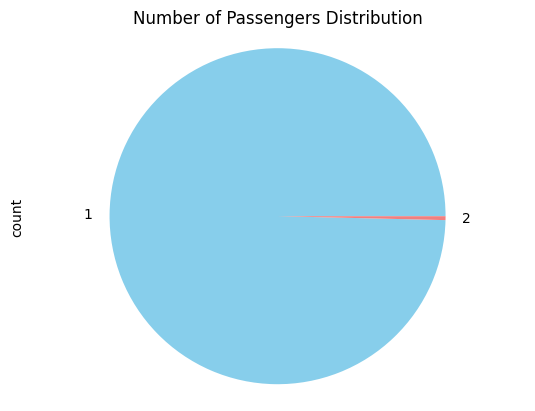

In [19]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightsalmon', 'lightseagreen', 'lightsteelblue']
df['number_passengers'].value_counts().plot(kind='pie', colors=colors)
plt.axis('equal')  
plt.title('Number of Passengers Distribution')
plt.show()

In [20]:
aut = (df['date_cancellation'] == '0').sum()
au=(df['date_cancellation'] != '0').sum()

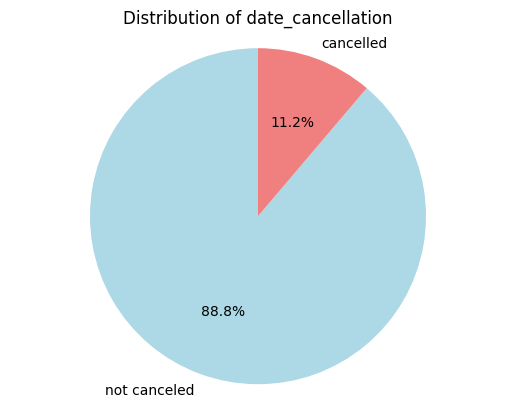

In [21]:
labels = ['not canceled', 'cancelled']
sizes = [aut, au]
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.axis('equal')
plt.title('Distribution of date_cancellation')

plt.show()

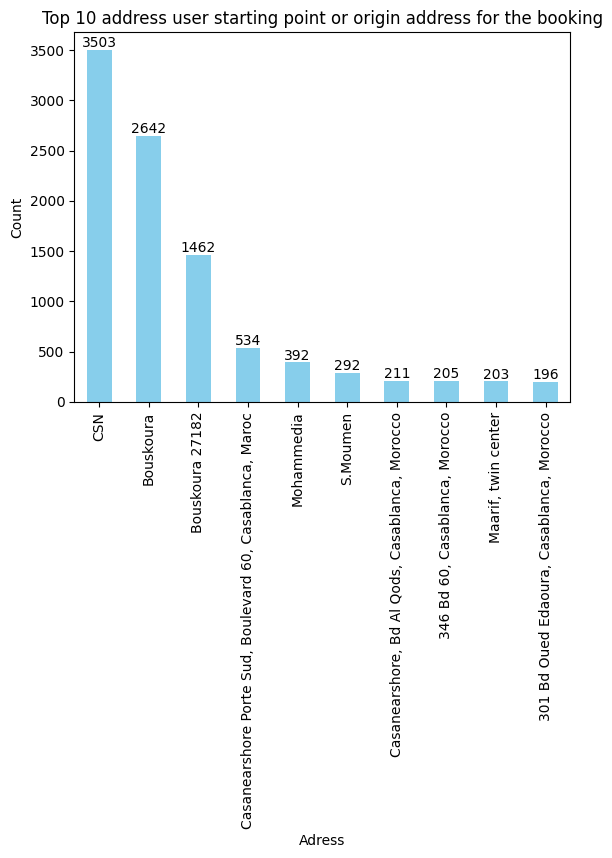

In [22]:
ao=df['address_origin'].value_counts().nlargest(10).plot(kind='bar',color='skyblue')
for p in ao.patches:
    ao.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('Adress')
plt.ylabel('Count')
plt.title('Top 10 address user starting point or origin address for the booking')
plt.show()

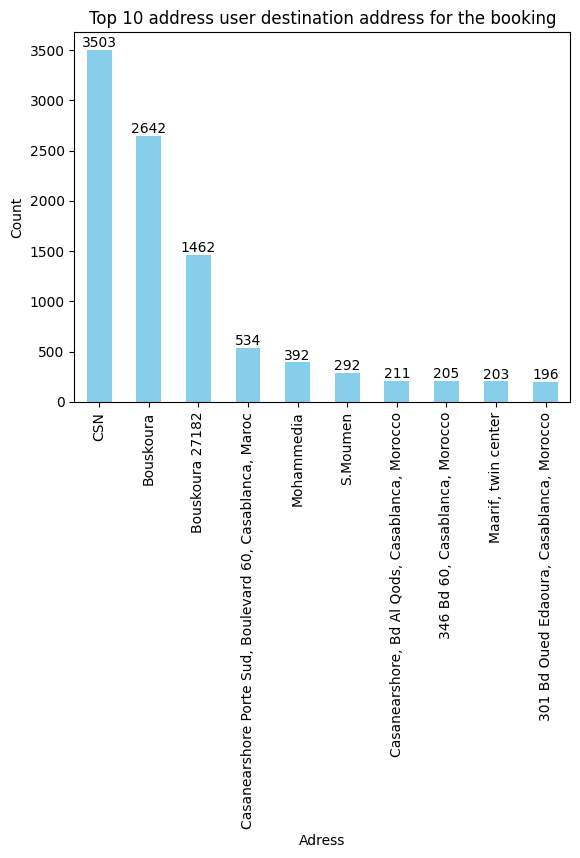

In [23]:
ao=df['address_origin'].value_counts().nlargest(10).plot(kind='bar',color='skyblue')
for p in ao.patches:
    ao.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('Adress')
plt.ylabel('Count')
plt.title('Top 10 address user destination address for the booking')
plt.show()

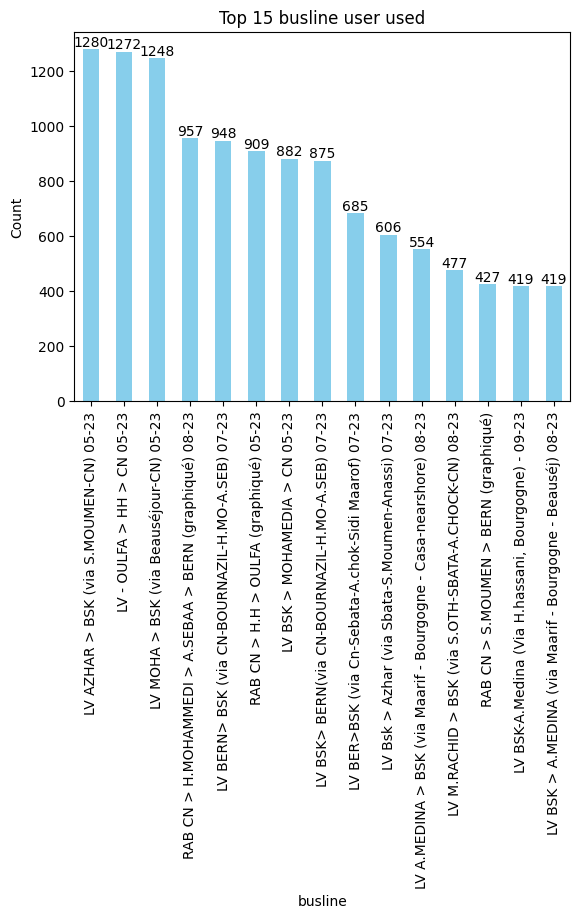

In [24]:
bn=df['busline_name'].value_counts().nlargest(15).plot(kind='bar',color='skyblue')
for p in bn.patches:
    bn.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('busline')
plt.ylabel('Count')
plt.title('Top 15 busline user used')
plt.show()

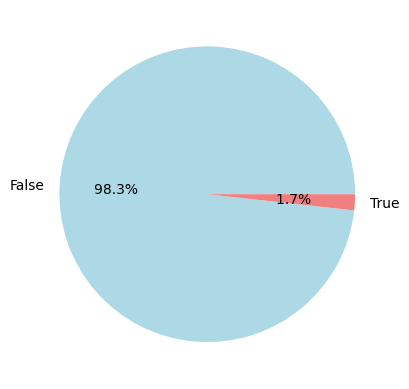

In [25]:
colors = ['lightblue', 'lightcoral']
df['is_user_anonymized'].value_counts().plot(kind='pie', autopct=lambda p: '{:.1f}% '.format(p), colors=colors)
plt.axis('off')
plt.show()

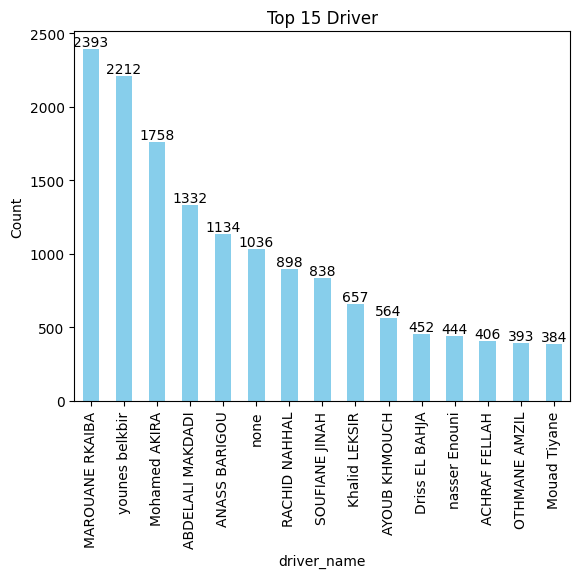

In [26]:
dn=df['driver_name'].value_counts().nlargest(15).plot(kind='bar',color='skyblue')
for p in dn.patches:
    dn.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('driver_name')
plt.ylabel('Count')
plt.title('Top 15 Driver')
plt.show()

In [27]:
# df.query()
dr=df[df['rating_driver']==5].reset_index()

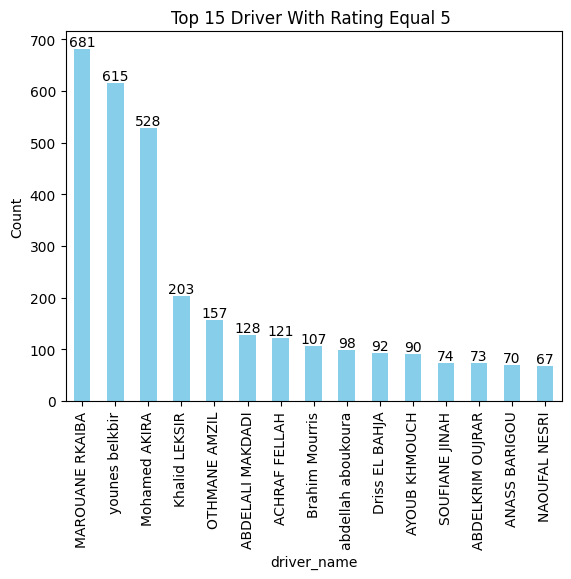

In [28]:
dr=dr['driver_name'].value_counts().nlargest(15).plot(kind='bar',color='skyblue')
for p in dr.patches:
    dr.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('driver_name')
plt.ylabel('Count')
plt.title('Top 15 Driver With Rating Equal 5 ')
plt.show()

In [29]:
df['initial_price'].describe()

count    17722.000000
mean        22.222040
std          6.292152
min          0.000000
25%         18.000000
50%         20.000000
75%         25.000000
max         60.000000
Name: initial_price, dtype: float64

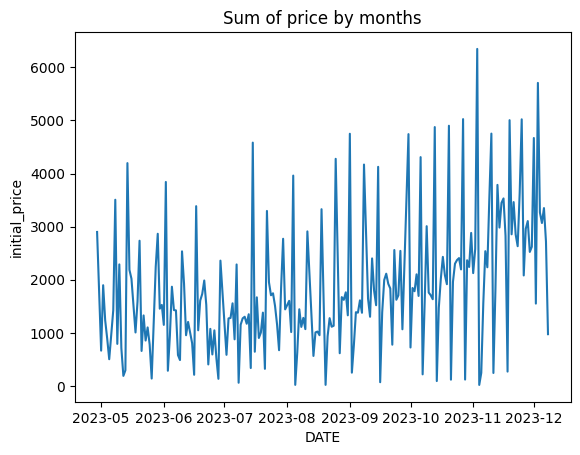

In [30]:
di=df.groupby('date_booking')['initial_price'].sum().reset_index()
sns.lineplot(x=di['date_booking'],y=di['initial_price'])
plt.title('Sum of price by months')
plt.xlabel('DATE')
plt.ylabel('initial_price')
plt.show()

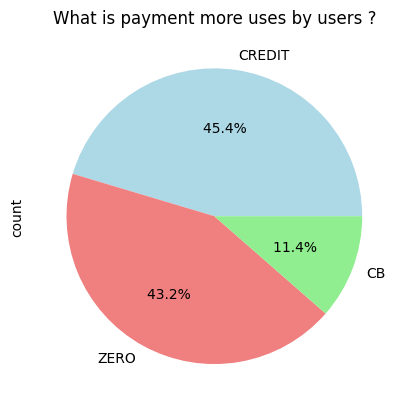

In [31]:
colors = ['lightblue', 'lightcoral', 'lightgreen', 'orange']
df['payment_mode'].value_counts().plot(kind='pie', autopct=lambda p: '{:.1f}% '.format(p), colors=colors)
plt.title('What is payment more uses by users ?')
plt.show()

** sum of people not use any discount_code =  11042


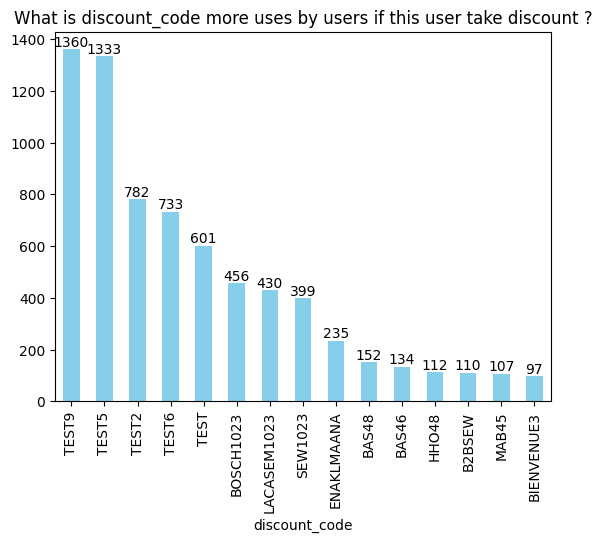

In [32]:
disc=df[df['discount_code']!='0'].reset_index()
dit=disc['discount_code'].value_counts().nlargest(15).plot(kind='bar',color='skyblue')
for p in dit.patches:
    dit.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')
plt.title('What is discount_code more uses by users if this user take discount ?')

print('** sum of people not use any discount_code = ', disc['discount_code'].count())
plt.show()

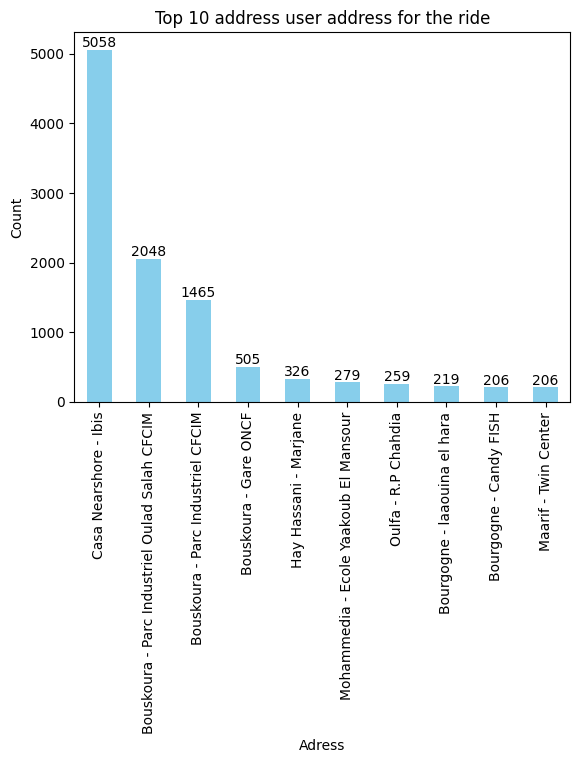

In [33]:
ap=df['address_pickup'].value_counts().nlargest(10).plot(kind='bar',color='skyblue')
for p in ap.patches:
    ap.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('Adress')
plt.ylabel('Count')
plt.title('Top 10 address user address for the ride')
plt.show()

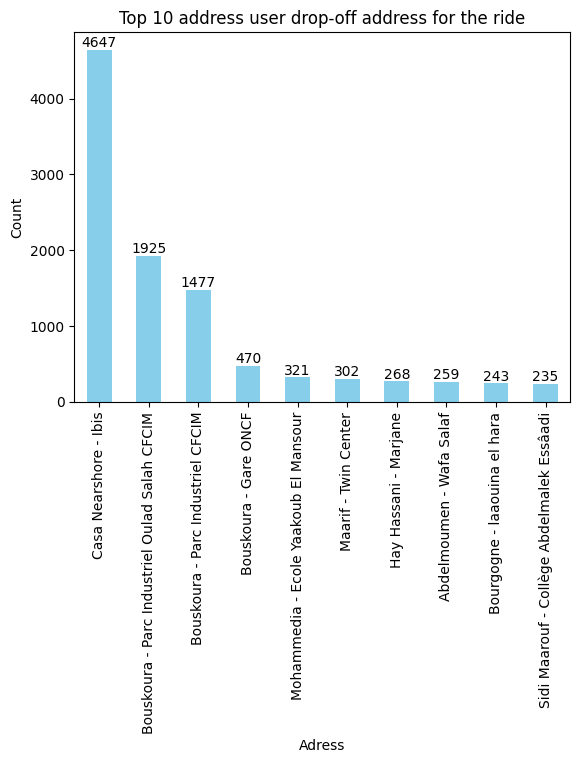

In [34]:
ad=df['address_dropoff'].value_counts().nlargest(10).plot(kind='bar',color='skyblue')
for p in ad.patches:
    ad.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('Adress')
plt.ylabel('Count')
plt.title('Top 10 address user drop-off address for the ride')
plt.show()

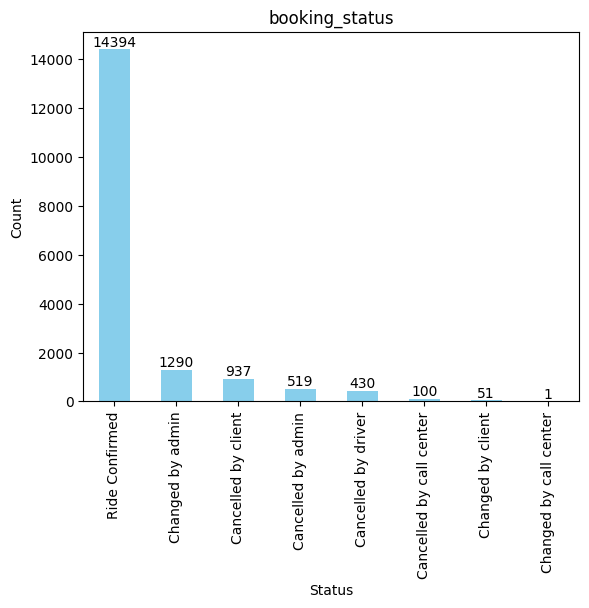

In [35]:
import matplotlib.pyplot as plt

bs = df['booking_status'].value_counts().plot(kind='bar', color='skyblue')

for i, p in enumerate(bs.patches):
    bs.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')


plt.xlabel('Status')
plt.ylabel('Count')
plt.title('booking_status')
plt.show()


## Querys

In [36]:
df['booking_status'].value_counts()

booking_status
Ride Confirmed              14394
Changed by admin             1290
Cancelled by client           937
Cancelled by admin            519
Cancelled by driver           430
Cancelled by call center      100
Changed by client              51
Changed by call center          1
Name: count, dtype: int64

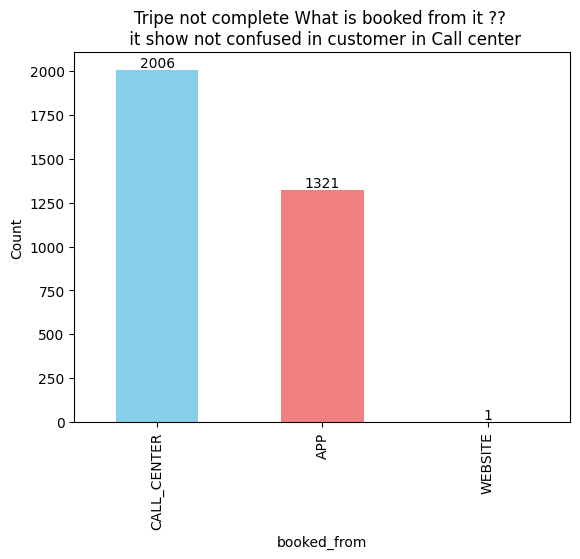

In [37]:
import matplotlib.pyplot as plt

dcca = df.query('date_cancellation !="0" and booking_status == "Cancelled by admin" or booking_status == "Changed by admin" or booking_status == "Cancelled by client" or booking_status == "Cancelled by driver" or booking_status == "Cancelled by call center" or booking_status == "Changed by call center" or booking_status == "Changed by client"').reset_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightsalmon', 'lightseagreen', 'lightsteelblue']

dc = dcca['booked_from'].value_counts().plot(kind='bar', color=colors)

for p in dc.patches:
    dc.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.xlabel('booked_from')
plt.ylabel('Count')
plt.title('Tripe not complete What is booked from it ?? \n it show not confused in customer in Call center')
plt.show()


1. **Booking Statuses:** Understand the distribution of booking statuses, particularly cancellations, for operational optimization.

2. **User Anonymization:** Investigate how anonymization impacts user behaviors, helping cater to privacy preferences.

3. **Busline Efficiency:** Focus on buslines with low fill rates weekly to improve scheduling, pricing, and marketing.

4. **Rating Metrics:** Analyze driver and service ratings to enhance overall service quality and user experience.

5. **Discount Codes:** Explore the impact of discount codes on bookings and revenue, refining marketing strategies.

Next Steps:
- **User Behavior:** Analyze patterns like preferred booking times and routes for targeted marketing.
- **Predictive Modeling:** Develop models for forecasting cancellations, fill rates, and user preferences.
- **Customer Feedback:** Delve into user feedback for specific improvement areas.
- **Competitor Benchmarking:** Compare performance against industry benchmarks for insights.

![Thanks](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLK-4PQVZLBGiS7avdTjwhkUWwvIh-BRXF0w&usqp=CAU)